In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
dataset=pd.read_csv('C:/Users/Bharathi/Downloads/titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


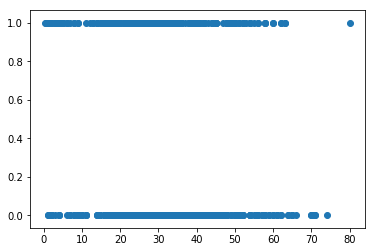

In [6]:
X=dataset.drop('Survived',axis=1)
y=dataset['Survived']

plt.scatter(dataset['Age'],dataset['Survived'])

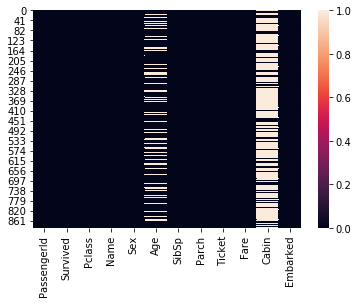

In [7]:
sb.heatmap(dataset.isnull())

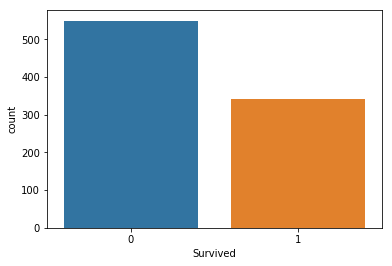

In [8]:
sb.countplot(x='Survived',data=dataset)

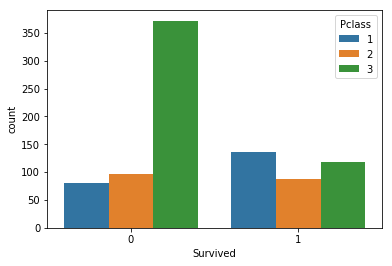

In [9]:
sb.countplot(x='Survived',hue='Pclass',data=dataset)

Survived
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

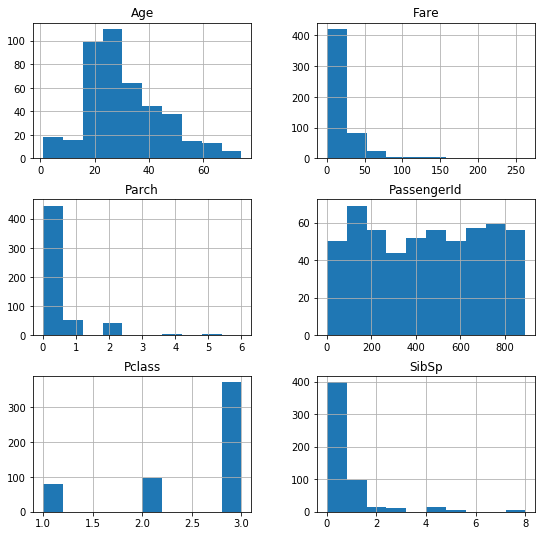

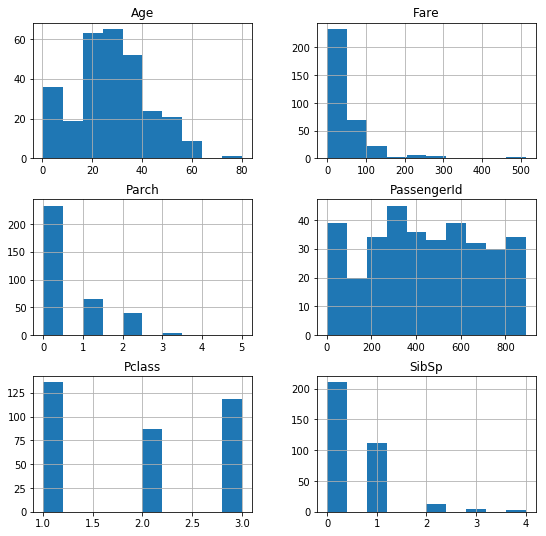

In [10]:
dataset.groupby('Survived').hist(figsize=(9,9))

In [11]:
print(dataset.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


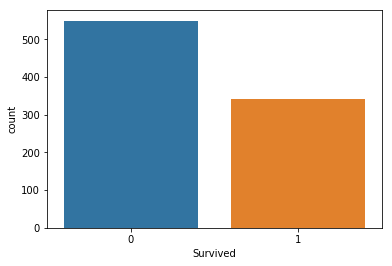

In [12]:
import seaborn as sb
sb.countplot(dataset['Survived'],label="Count")

In [13]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
            return Age

In [14]:
dataset['Age']=dataset[['Age','Pclass']].apply(impute_age,axis=1)

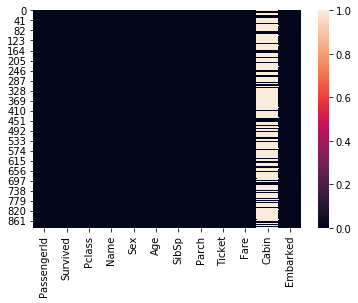

In [15]:
sb.heatmap(dataset.isnull())

In [16]:
dataset.drop('Cabin',axis=1,inplace=True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


In [18]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
embark=pd.get_dummies(dataset['Embarked'],drop_first=True)

In [19]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [20]:
dataset=pd.concat([dataset,sex,embark],axis=1)

In [21]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset.loc[:,dataset.columns!='Survived'],dataset['Survived'],
                                               stratify=dataset['Survived'] ,random_state=66)

In [23]:
pd.concat((X_test,y_test),axis=1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
771,3,48.00,0,0,7.8542,1,0,1,0
864,2,24.00,0,0,13.0000,1,0,1,0
216,3,27.00,0,0,7.9250,0,0,1,1
749,3,31.00,0,0,7.7500,1,1,0,0
266,3,16.00,4,1,39.6875,1,0,1,0
676,3,24.50,0,0,8.0500,1,0,1,0
193,2,3.00,1,1,26.0000,1,0,1,1
306,1,37.00,0,0,110.8833,0,0,0,1
147,3,9.00,2,2,34.3750,0,0,1,0
56,2,21.00,0,0,10.5000,0,0,1,1


In [24]:
#import Random forest model
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian classifier
clf=RandomForestClassifier(n_estimators=100)

#train the model using the training set y_pred=clf.predict(x_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [26]:
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("Accuracy:"),metrics.accuracy_score(y_test,y_pred)

Accuracy:


(None, 0.8654708520179372)